In [11]:
import numpy as np
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from sklearn import preprocessing, cross_validation

C:\Users\Matt\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
model = MLPRegressor(hidden_layer_sizes = (500,500,500), max_iter = 500)

In [13]:
N=10000

In [14]:
path = '../Data/fBmFields/2DUnexponentiated/100px/'
y = np.loadtxt(path+'params.txt')
X = [np.loadtxt(path+'field_'+format(i,'06d')+'.txt').flatten() for i in range(N)]
print(np.shape(X_train))

(10000, 10000)


In [15]:
X = preprocessing.scale(X)

In [16]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

In [17]:
model.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(500, 500, 500), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [20]:
from NeuralNet import Pearson, RMSE

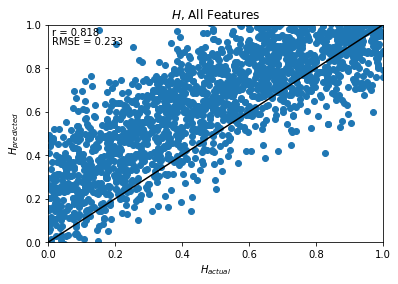

In [24]:
predictions = model.predict(X_test)

x_lin = np.linspace(np.amin(y_test),np.amax(y_test),100)
y_lin = x_lin

plt.figure()
plt.scatter(y_test,predictions)
plt.text(0.01, 0.95, 'r = '+ '{:.3g}'.format(Pearson(y_test,predictions)))
plt.text(0.01, 0.91, 'RMSE = '+ '{:.3g}'.format(RMSE(y_test,predictions)))
plt.plot(x_lin,y_lin,c='k')
plt.ylim([0,1])
plt.xlim([0,1])
plt.xlabel(r'$H_{actual}$')
plt.ylabel(r'$H_{predicted}$')
plt.title(r'$H $, All Features')
plt.show()
plt.savefig('hAll.png', dpi=1200)